In [1]:
import pandas as pd
import numpy as np
import os 
from sklearn.naive_bayes import GaussianNB
import pickle

In [2]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)
    


In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

1500 registros em três colunas de idade, renda e dívida. O segundo são as classe entre as pessoas que pagam e não pagam

In [4]:
X_credit_teste.shape, y_credit_teste.shape


((500, 3), (500,))

Enviar para o algoritmo depois de treinado 500 registros

In [5]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X=X_credit_treinamento, y=y_credit_treinamento)

GaussianNB()

In [6]:
# Enviando os 500 registros que não foram utilizados no treinamento.
previsoes = naive_credit_data.predict(X_credit_teste)

In [7]:
sum(previsoes == y_credit_teste) / len(y_credit_teste)

0.938

In [8]:
# Contar quantos acertos e quantos erros.
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
accuracy_score(y_true=y_credit_teste, y_pred=previsoes)

0.938

By definition a confusion matrix C is such that $C_{i, j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.  
Thus in binary classification, the count of:  

\begin{center}
    true negatives is $C_{0,0}$  
    false negatives is $C_{1,0}$  
    true positives is $C_{1,1}$  
    false positives is $C_{0,1}$.  
\end{center}

428 clientes que pagam e foram classifacados como que pagam  
8 clientes que pagam e foram classifacados como que não pagam  
23 clientes que não pagam e foram classifacados como que pagam  
41 clientes que não pagam e foram classifacados como que não pagam  

In [10]:
confusion_matrix(y_true=y_credit_teste, y_pred=previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

Alternativa à visualização: YellowBrick -- https://www.scikit-yb.org/en/latest/

In [11]:
from yellowbrick.classifier import ConfusionMatrix

0.938

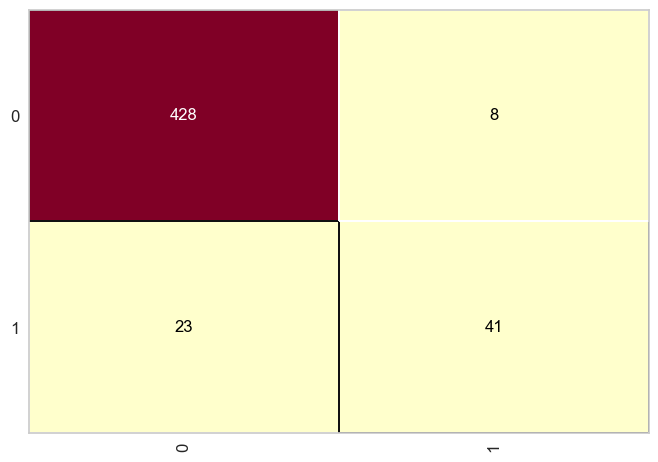

In [12]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

**Relatório de Classificação**

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_true=y_credit_teste, y_pred=previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

